In [12]:
import json
import pandas as pd

# JSON 파일 한 줄씩 읽어서 처리
import json
import pandas as pd

# 데이터 리스트 초기화
data_list = []

# JSON 파일 한 줄씩 읽어서 처리
with open('C:/SKN_3_MyProject/SKN_03_FINAL/Data/Final/add_genre_story.json', 'r', encoding='utf-8-sig') as file:
    for line in file:
        # 한 줄의 JSON 문자열을 딕셔너리로 변환
        data = json.loads(line.strip())
        data_list.append(data)  # 리스트에 추가

# 리스트를 DataFrame으로 변환
df = pd.DataFrame(data_list)

In [13]:
import pandas as pd

# cast 열을 쉼표로 나누고 행으로 확장
df["cast_split"] = df["cast"].str.split(", ")  # 쉼표로 분리
df_expanded = df.explode("cast_split").reset_index(drop=True)  # 행으로 확장

# cast_split 열 이름을 cast로 덮어쓰기
df_expanded["cast"] = df_expanded["cast_split"]
df_expanded = df_expanded.drop(columns=["cast_split"])

In [14]:
# 필요한 열만 선택
df_selected = df_expanded[["cast", "title", "genre"]]

In [15]:
# 대괄호 안의 내용 제거
df_selected['title'] = df_selected['title'].str.replace(r'\s*\[.*?\]', '', regex=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_8160\1453986115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['title'] = df_selected['title'].str.replace(r'\s*\[.*?\]', '', regex=True)


In [16]:
# '등'을 제거하고 공백을 제거
df_selected['cast'] = df_selected['cast'].str.replace('등', '', regex=False).str.strip()

C:\Users\USER\AppData\Local\Temp\ipykernel_8160\1186316706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cast'] = df_selected['cast'].str.replace('등', '', regex=False).str.strip()


In [17]:
import pandas as pd
import numpy as np

# 예시 DataFrame (df_selected)
# df_selected = pd.DataFrame([...])
df_selected['target'] = 1
# 1. target=1인 데이터만 필터링
positive_df = df_selected[df_selected['target'] == 1]

# 2. 전체 영화 목록 추출 (중복 제거)
all_movies = df_selected[['title', 'genre']].drop_duplicates()

# 3. 부정 샘플을 위한 빈 리스트 생성
negative_samples = []

# 4. 각 배우에 대해 해당 배우가 등장한 영화 외의 영화들에 대해 target=0으로 샘플 생성
for _, row in positive_df.iterrows():
    cast = row['cast']
    movies_played_by_cast = positive_df[positive_df['cast'] == cast]['title'].unique()
    genres_played_by_cast = positive_df[positive_df['cast'] == cast]['genre'].unique()
    
    # 해당 배우가 등장하지 않은 영화들 중 장르가 동일하지 않은 영화만
    non_cast_movies = all_movies[
        ~all_movies['title'].isin(movies_played_by_cast) & 
        ~all_movies['genre'].isin(genres_played_by_cast)
    ]
    
    # negative sampling: 배우가 등장하지 않은 영화에 대해 target=0
    # `4배`만큼 랜덤 샘플링
    non_cast_movies_sampled = non_cast_movies.sample(n=len(movies_played_by_cast) * 4, random_state=42, replace=True)
    
    # 샘플링된 영화와 그에 해당하는 배우 및 target=0을 negative_samples에 추가
    for _, movie_row in non_cast_movies_sampled.iterrows():
        negative_samples.append({'cast': cast, 'title': movie_row['title'], 'genre': movie_row['genre'], 'target': 0})

# 5. negative_samples 리스트로부터 새로운 DataFrame 생성
negative_df = pd.DataFrame(negative_samples)

# 6. 기존 DataFrame과 negative samples DataFrame을 합침
df_with_negatives = pd.concat([df_selected, negative_df], ignore_index=True)

df_with_negatives.to_json('C:/SKN_3_MyProject/SKN_03_FINAL/Data/Final/df_with_negatives.json', orient='records', lines=True, force_ascii=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_8160\3964183270.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['target'] = 1


# 수치형 변수 없는 ㄹㅇ 쌩모델

Length of X: 43337
Length of y: 43337


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 1, 8)      │      2,848 │ title[0][0]       │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_4         │ (None, 1, 8)      │     13,096 │ cast[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 8)         │          0 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 8)         │          0 │ embedding_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 16)        │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │      2,176 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │      2,080 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ genre (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         33 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 28,489 (111.29 KB)

 Trainable params: 28,489 (111.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


c:\SKN_3_MyProject\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['title', 'cast', 'genre']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


542/542 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9049 - loss: 0.3283 - val_accuracy: 0.9184 - val_loss: 0.2331
Epoch 2/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9328 - loss: 0.1956 - val_accuracy: 0.9422 - val_loss: 0.2051
Epoch 3/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9573 - loss: 0.1450 - val_accuracy: 0.9525 - val_loss: 0.1824
Epoch 4/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9685 - loss: 0.1105 - val_accuracy: 0.9571 - val_loss: 0.1885
Epoch 5/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9745 - loss: 0.0892 - val_accuracy: 0.9590 - val_loss: 0.2001
Epoch 6/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9782 - loss: 0.0721 - val_accuracy: 0.9593 - val_loss: 0.1959


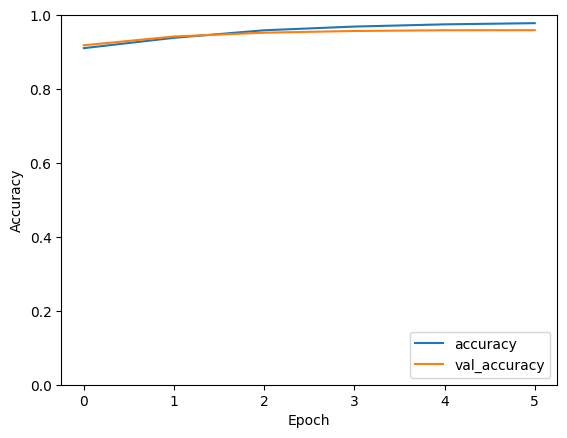

271/271 - 0s - 548us/step - accuracy: 0.9525 - loss: 0.1824
Test Accuracy: 0.9524688720703125


In [20]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Concatenate, Flatten, Add, Lambda, Dropout
import tensorflow as tf
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# MusicalRecommender 클래스 정의
class MusicalRecommender:
    def __init__(self):
        self.data = None
        self.original_data = None
        self.model = None
        self.label_encoders = {}
        self.vocab_sizes = {}
    
    def load_and_preprocess_data(self):
        # 데이터 로드 및 전처리
        # Load data (Ensure the file is in the same directory or provide correct relative path)
        self.data = pd.read_json('C:/SKN_3_MyProject/SKN_03_FINAL/Data/Final/df_with_negatives.json', lines=True)  # Update the path to a relative one if necessary
        self.original_data = self.data.copy()
        
        categorical_features = ['title', 'cast', 'genre']
        
        # 범주형 변수 레이블 인코딩
        for feature in categorical_features:
            self.label_encoders[feature] = LabelEncoder()
            self.data[feature] = self.label_encoders[feature].fit_transform(self.data[feature].astype(str))
            self.vocab_sizes[feature] = len(self.label_encoders[feature].classes_)

    def prepare_training_data(self):
        # 범주형 데이터와 수치형 데이터를 처리
        categorical_features = ['title', 'cast', 'genre']
        categorical_data = {}
        
        for feature in categorical_features:
            categorical_data[feature] = self.data[feature].values  # 각 범주형 데이터를 딕셔너리에 저장
        
        
        # X 구성: 카테고리형 데이터와 수치형 데이터를 모두 합친 DataFrame 생성
        X = pd.DataFrame({
            'title': categorical_data['title'],
            'cast': categorical_data['cast'],
            'genre': categorical_data['genre']  # 첫 번째 수치형 변수
        })
        
        # 타겟 데이터
        y = self.data['target']
        
        # X와 y의 길이가 일치하는지 확인
        print(f"Length of X: {len(X)}")
        print(f"Length of y: {len(y)}")
        
        # 길이가 일치하면 훈련/테스트 데이터로 분리
        if len(X) == len(y):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        else:
            print("Error: Lengths of X and y do not match!")
        
        return X_train, X_test, y_train, y_test
    
    def create_deepfm_model(self):
        # 모델 구조 정의
        inputs = {
            'title': Input(shape=(1,), dtype=tf.int32, name='title'),
            'cast': Input(shape=(1,), dtype=tf.int32, name='cast'),
            'genre': Input(shape=(1,), dtype=tf.int32, name='genre')
        }
        
        embeddings = {
            'title': Embedding(self.vocab_sizes['title'], 8)(inputs['title']),
            'cast': Embedding(self.vocab_sizes['cast'], 8)(inputs['cast']),
            'genre': Embedding(self.vocab_sizes['genre'], 8)(inputs['genre']),
        }
        
        # Flatten embeddings and concatenate with numerical data
        concatenated = Concatenate()([Flatten()(embeddings['title']), Flatten()(embeddings['cast'])])
        
        # Hidden layers
        x = Dense(128, activation='relu')(concatenated)
        x = Dropout(0.3)(x)
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.3)(x)
        x = Dense(32, activation='relu')(x)
        output = Dense(1, activation='sigmoid')(x)  # For binary classification

        self.model = Model(inputs=[inputs['title'], inputs['cast'], inputs['genre']], outputs=output)
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.model.summary()

    def train_model(self):
        X_train, X_test, y_train, y_test = self.prepare_training_data()
        self.create_deepfm_model()

        # EarlyStopping 콜백 정의
        early_stopping = EarlyStopping(
            monitor='val_loss',  # 검증 손실을 모니터링
            patience=3,          # 손실이 개선되지 않으면 3 에포크 후 중지
            restore_best_weights=True  # 가장 좋은 모델 가중치를 복원
        )
        
        # Train the model and display progress
        history = self.model.fit(
            [X_train['title'], X_train['cast'], X_train['genre']],
            y_train,
            batch_size=64,
            epochs=20,
            verbose=1,
            validation_data=([X_test['title'], X_test['cast'], X_test['genre']], y_test),
            callbacks=[early_stopping]  
        )
        
        # Plot training history
        plt.plot(history.history['accuracy'], label='accuracy')
        plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.ylim([0, 1])
        plt.legend(loc='lower right')
        plt.show()
        
        test_loss, test_acc = self.model.evaluate(
            [X_test['title'], X_test['cast'], X_test['genre']],
            y_test, verbose=2
        )
        print(f"Test Accuracy: {test_acc}")

        return test_loss, test_acc


# Initialize the recommender system and train
recommender = MusicalRecommender()
recommender.load_and_preprocess_data()
test_loss, test_acc = recommender.train_model()